In [201]:
import calendar
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import locale
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
from scipy import sparse

In [202]:
df = pd.read_csv('penjualan barang.csv')
df.head()

,Unnamed: 0,tanggal,nama.pembeli,nama.barang,kuantum,nominal
0,1,2020-01-02,TOKO HERUNIAWATI,BERAS,1000.0,9840000.0
1,2,2020-01-02,TOKO HERUNIAWATI,DAGING,120.0,8400000.0
2,3,2020-01-02,TOKO APRILIA SUKRISNI,BERAS,6000.0,62910000.0
3,4,2020-01-02,TOKO APRILIA SUKRISNI,MIGOR,408.0,4855200.0
4,5,2020-01-02,TOKO APRILIA SUKRISNI,TEPUNG,140.0,1162000.0


In [203]:
# df.dtypes

In [204]:
# Pre-processing Date.Time
df = df.drop(['Unnamed: 0'],axis=1)
locale.setlocale(locale.LC_TIME, 'id_ID')
df['tanggal'] = pd.to_datetime(df['tanggal'])
df['Hari'] = df['tanggal'].dt.day_name(locale= 'id_ID')
df['Bulan'] = df['tanggal'].dt.month_name(locale= 'id_ID')
df['Tahun'] = df['tanggal'].dt.year

# # LabelEncoding
# df['nama.pembeli'] = LabelEncoder().fit_transform(df['nama.pembeli'])

In [205]:
print(df.isnull().sum())
print('-----------------')
print(df.isnull().sum())

In [206]:
print(df['nama.barang'].unique())
print('---------------------------------')
print(df['nama.barang'].value_counts())

['BERAS' 'DAGING' 'MIGOR' 'TEPUNG' 'GULA']
---------------------------------
BERAS     836
DAGING    184
GULA      121
TEPUNG     77
MIGOR      71
Name: nama.barang, dtype: int64


In [207]:
print(df['nama.pembeli'].unique())
print('---------------------------------')
print(df['nama.pembeli'].value_counts())

['TOKO HERUNIAWATI' 'TOKO APRILIA SUKRISNI' 'TOKO MAJU TERUS'
 'KOPERASI BRI MELAWI' 'TOKO DEB' 'TOKO FATHULLAH ZIKRI' 'TOKO FAHRI'
 'TOKO KEDAI YUDA' 'TOKO KOPERASI KONSUMEN SYARIAH BERKAH BERSEMI'
 'Harya Sari' 'TOKO SUPER STOCK' 'TOKO HARYATI ' 'TOKO KARDI '
 'TOKO KHET MEN ' 'TOKO ENDANG HARTATI ' 'TOKO DWI SUSILO '
 'TOKO CAH HERU ' 'TOKO AANG  DARMAWAN ' 'TOKO DIDIK PRIOJADMIKO '
 'TOKO HENI LAY ' 'TOKO APRIYANTO ' 'Warung Nak Zihan' 'TOKO MUNIR'
 'TOKO KARYA BINJAI' 'TOKO KIAN KIONG ' 'TOKO ANDREAS INDAH '
 'TOKO NURDIAH ' 'KARUNIA' 'TOKO REVAN' 'TOKO DOA IBU' 'SAHABAT ANDA'
 'TOKO AQIL' 'TOKO ABIZAR' 'TOKO SARDIYANTO ' 'TOKO EKA SAPUTRA JAYA '
 'TOKO FAKHLI HARUDI ' 'ANDY' 'TOKO IFAL' 'Langkah Jaya'
 'TOKO ANDRI SUGIANTO ' 'TOKO JESAYA GINTING ' 'TOKO HIDAYAH'
 'TOKO BERKAH DUA PUTRA' 'TOKO YENNI SUSILAWATI '
 'TOKO ENDANG SUSILAWATI ' 'TOKO DIANA RISTA ' 'TOKO WARUNG SANTI'
 'TOKO BOB-i' 'TOKO BUMDES USAHA JAYA BERSAMA'
 'TOKO DARKUM KOPERASI DISPERINDAG ' 'TPK PASAR JUNJUNG B

Text(0.5, 1.0, 'Urutan Nama Produk Paling Laris')

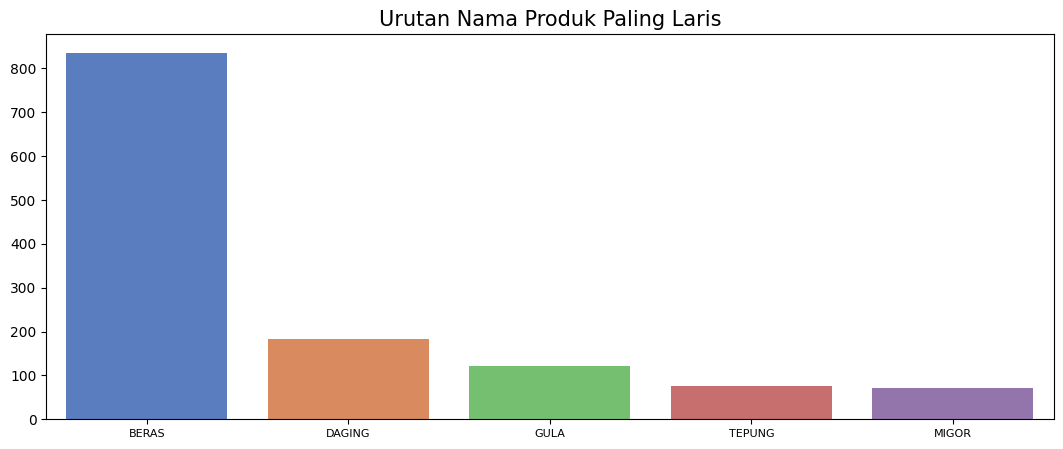

In [208]:
# Top 10 Produk Paling Laris

plt.figure(figsize=(13,5))
sns.set_palette('muted')

sns.barplot(x = df["nama.barang"].value_counts()[:10].index,
            y = df["nama.barang"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 8)
plt.title('Urutan Nama Produk Paling Laris',size = 15)

Text(0.5, 1.0, 'Urutan Nama Toko Pembeli Langganan')

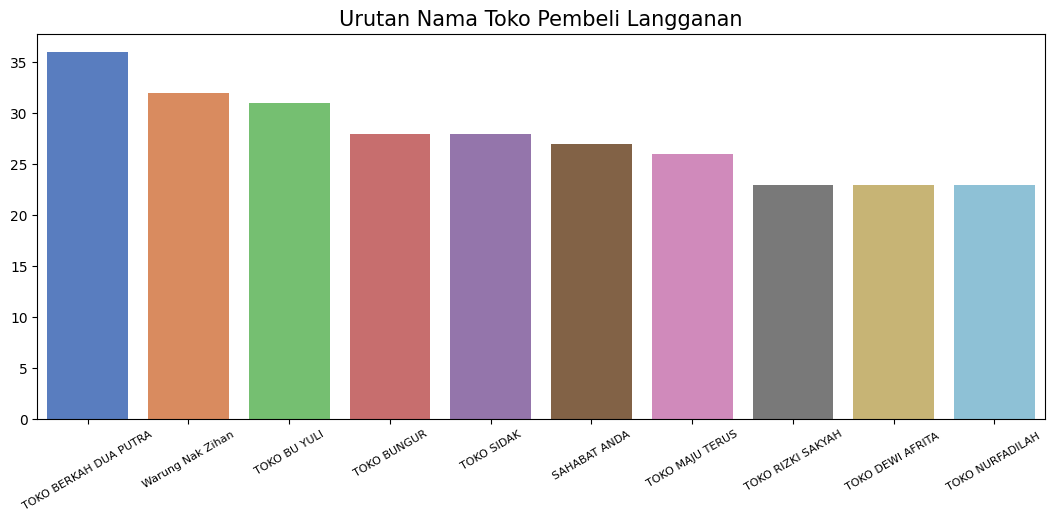

In [209]:
# Top 10 Produk Paling Laris

plt.figure(figsize=(13,5))
sns.set_palette('muted')

sns.barplot(x = df["nama.pembeli"].value_counts()[:10].index,
            y = df["nama.pembeli"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 8,rotation = 30)
plt.title('Urutan Nama Toko Pembeli Langganan',size = 15)

Text(0.5, 1.0, 'Total Pembelian Tiap Hari')

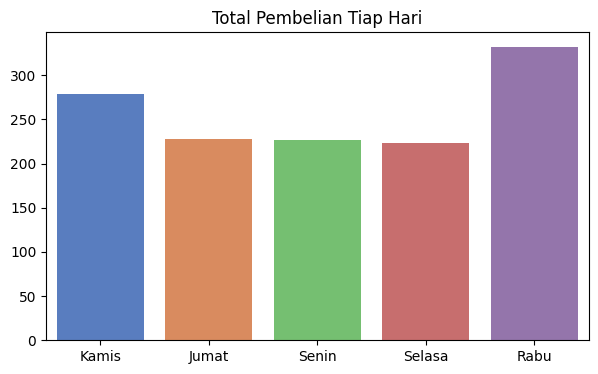

In [210]:
df_bulan = df.groupby('Hari')['nama.pembeli'].count()
df_bulan = pd.concat([df_bulan.iloc[4:], df_bulan.iloc[:4]])

plt.figure(figsize=(7,4))
sns.barplot(x = df['Hari'].unique(), y = df_bulan.values)

plt.xticks(size = 10)
plt.title('Total Pembelian Tiap Hari', size = 12)

Text(0.5, 1.0, 'Total Pembelian Tiap Bulan')

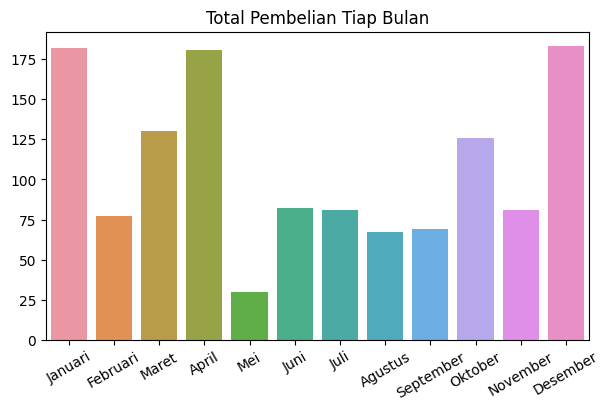

In [211]:
df_bulan = df.groupby('Bulan')['nama.pembeli'].count()
df_bulan = pd.concat([df_bulan.iloc[4:], df_bulan.iloc[:4]])

plt.figure(figsize=(7,4))
sns.barplot(x = df['Bulan'].unique(), y = df_bulan.values)

plt.xticks(size = 10,rotation = 30)
plt.title('Total Pembelian Tiap Bulan', size = 12)

In [212]:
item_count_pivot = df.pivot_table(index='nama.pembeli',columns='nama.barang', values= 'kuantum',aggfunc='sum').fillna(0)
item_count_pivot[item_count_pivot > 0] =1
item_count_pivot.head(10)

nama.barang,BERAS,DAGING,GULA,MIGOR,TEPUNG
nama.pembeli,,,,,
ANAPSA,1.0,1.0,1.0,0.0,0.0
ANDY,1.0,1.0,0.0,0.0,0.0
HOLIDAY MART,0.0,0.0,1.0,0.0,0.0
Harya Sari,1.0,1.0,0.0,0.0,0.0
KARUNIA,1.0,1.0,0.0,0.0,0.0
KOPERASI BRI MELAWI,1.0,0.0,0.0,1.0,1.0
Langkah Jaya,1.0,1.0,0.0,0.0,0.0
MEKAR SARI,1.0,1.0,0.0,0.0,0.0
PT. BANK RAKYAT INDONESIA (PERSERO) Tbk.,1.0,0.0,0.0,0.0,0.0


In [213]:
# Keterangan Olah Dataset
print('Dimensi Dataset :',item_count_pivot.shape)
print('Jumlah Transaksi :',item_count_pivot.shape[0])
print('Jumlah Barang :',item_count_pivot.shape[1])

Dimensi Dataset : (171, 5)
Jumlah Transaksi : 171
Jumlah Barang : 5


In [214]:
# Transformasi Data Sparse Matrix
te = TransactionEncoder()
te_ary = te.fit(item_count_pivot).transform(item_count_pivot)
df_encode = pd.DataFrame(te_ary, columns=te.columns_)

In [200]:
freq = apriori(item_count_pivot, min_support= 0.1, use_colnames= True)
freq.sort_values('support',ascending=False).head()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.912281,(BERAS)
1,0.397661,(DAGING)
5,0.374269,"(BERAS, DAGING)"
2,0.286550,(GULA)
6,0.216374,"(BERAS, GULA)"


In [167]:
rules = association_rules(freq,metric='lift',min_threshold=1)
rules.sort_values(by=['support','confidence','lift','conviction'],ascending=False).head(7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(DAGING),(BERAS),0.397661,0.912281,0.374269,0.941176,1.031674,0.011491,1.491228
0,(BERAS),(DAGING),0.912281,0.397661,0.374269,0.410256,1.031674,0.011491,1.021358
2,(GULA),(DAGING),0.286550,0.397661,0.210526,0.734694,1.847539,0.096577,2.270355
3,(DAGING),(GULA),0.397661,0.286550,0.210526,0.529412,1.847539,0.096577,1.516082
16,"(GULA, DAGING)",(BERAS),0.210526,0.912281,0.192982,0.916667,1.004808,0.000923,1.052632
14,"(BERAS, GULA)",(DAGING),0.216374,0.397661,0.192982,0.891892,2.242846,0.106939,5.571637
18,(GULA),"(BERAS, DAGING)",0.286550,0.374269,0.192982,0.673469,1.799426,0.085736,1.916301
